In [89]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [90]:
# 
df=pd.read_csv('resources/customer_data.csv')


In [91]:
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [92]:
df.tail(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5
99999,100000,35,Female,22249,College,West,Silver,rare,9426,Health,0,6


In [93]:
#Data cleaning
#Check for missing values
print(df.isnull().sum())

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64


In [94]:
df.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [95]:
gender=df['gender'].value_counts()
gender

gender
Female    50074
Male      49926
Name: count, dtype: int64

In [96]:
df['region'].value_counts()


region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [97]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [98]:
df['education'].value_counts()

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [99]:
df['loyalty_status'].value_counts()

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

In [100]:
df['product_category'].value_counts()

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64

In [101]:
df['satisfaction_score'].value_counts()

satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64

In [102]:
df['purchase_frequency'].value_counts()

purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64

In [103]:
df['promotion_usage'].value_counts()

promotion_usage
0    69920
1    30080
Name: count, dtype: int64

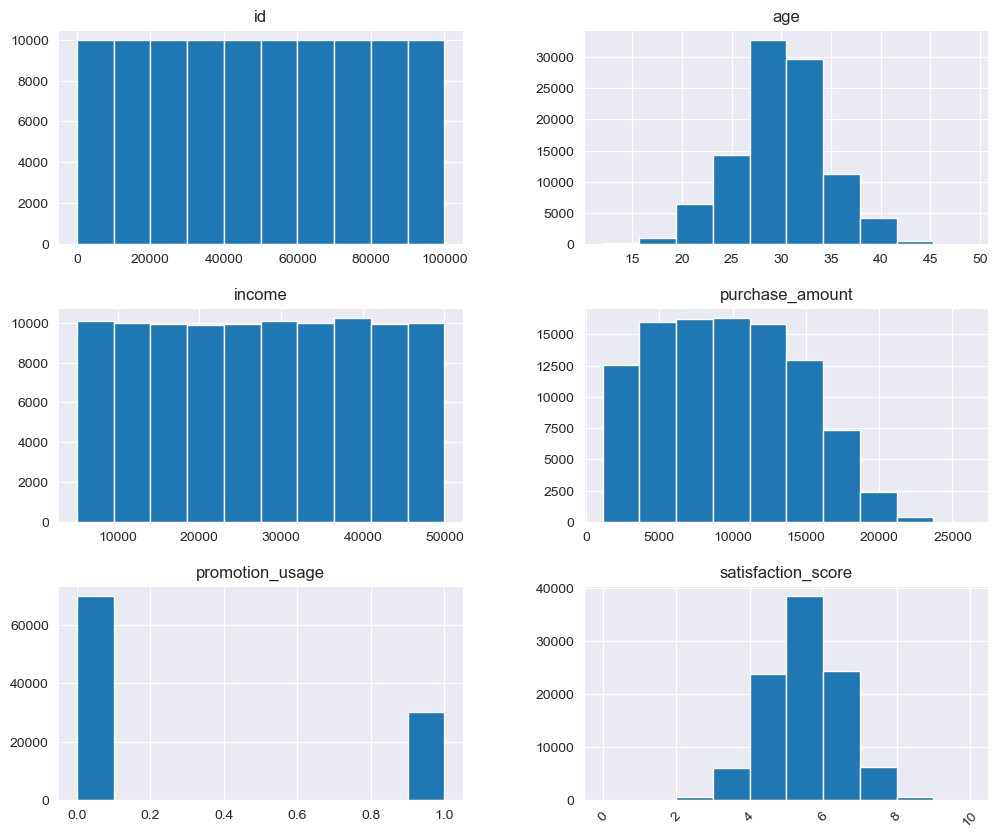

In [104]:
df.hist(figsize=(12, 10))
plt.xticks(rotation=45)  # Improve readability for categorical features
plt.show()

In [105]:
#Question 1

# Research Question: Do loyalty programs affect how frequently the customers shop? 

# Hypothesis: If loyalty programs are related to the frequency of customer purchases , there will be a strong correlation. 

# Null Hypothesis: There is no association between loyalty status and purchase frequency.

# Alternative Hypothesis: There is an assocaition between loyalty status and purchase frequency.


In [106]:
#Frequency table 
print(df['loyalty_status'].value_counts(), end = "\n\n")
print(df['purchase_frequency'].value_counts(), end = "\n\n")


loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64



In [107]:
# Do loyalty programs affect how frequntly the customers shop? 
purchase_by_loyalty = df.groupby("loyalty_status")["purchase_frequency"].value_counts()
purchase_by_loyalty

loyalty_status  purchase_frequency
Gold            rare                   4974
                occasional             2932
                frequent               1992
Regular         rare                  30112
                occasional            18037
                frequent              11989
Silver          rare                  14933
                occasional             8917
                frequent               6114
Name: count, dtype: int64

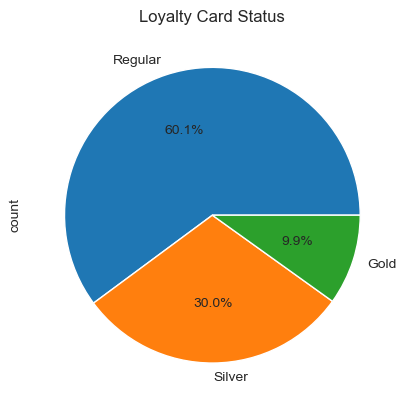

In [108]:
# Generate a pie plot showing the distribution loyalty status using Pandas
loyalty_plot = df["loyalty_status"].value_counts()
loyalty_plot.plot(kind='pie', autopct='%1.1f%%')

#Plot title
plt.title("Loyalty Card Status")
plt.savefig("resources/Loyalty Card Status")

#Display plot 
plt.show()

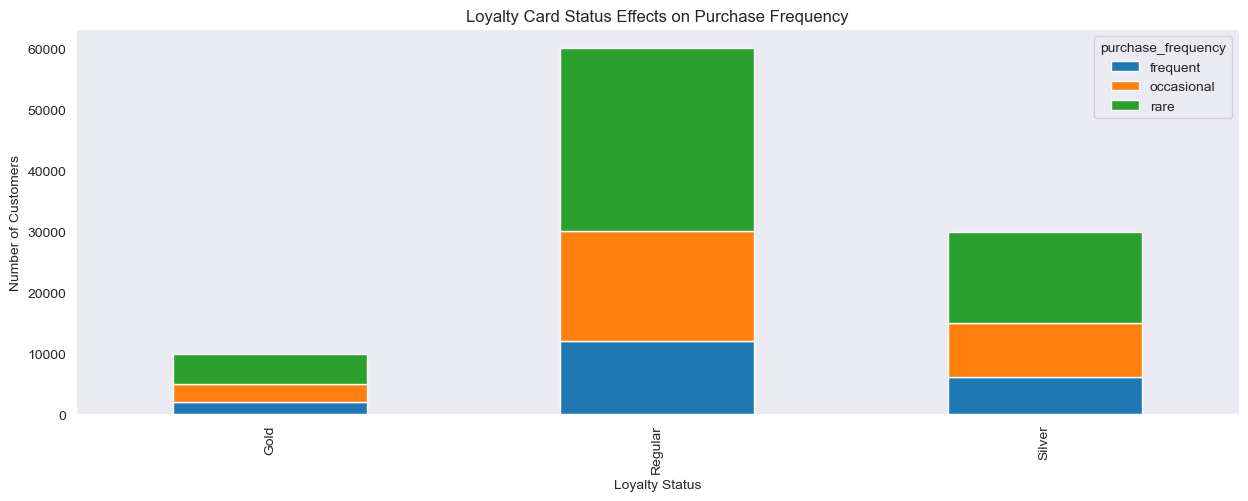

In [109]:
# Create stacked column chart 
stacked_chart = df.groupby(['loyalty_status', 'purchase_frequency']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))

# Label x and y axis and add title 
stacked_chart.set_xlabel("Loyalty Status")
stacked_chart.set_ylabel("Number of Customers")
plt.title("Loyalty Card Status Effects on Purchase Frequency")
plt.savefig("resources/Loyalty Card Status Effects on Purchase Frequency")
# Display plot
plt.show()


In [110]:
#Question 2

In [111]:
print(df['loyalty_status'].value_counts(), end = "\n\n")
print(df['education'].value_counts(), end = "\n\n")
print(df['region'].value_counts(), end = "\n\n")
print(df['gender'].value_counts(), end = "\n\n")
print(df['product_category'].value_counts(), end = "\n\n")

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

gender
Female    50074
Male      49926
Name: count, dtype: int64

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64



In [112]:
new_customer_df = df.drop([ 'id', 'income', 'education', 'region',
                 'loyalty_status','product_category','promotion_usage', 'satisfaction_score'], axis=1,)
new_customer_df.head(12)

,age,gender,purchase_frequency,purchase_amount
0,27,Male,frequent,18249
1,29,Male,rare,4557
2,37,Male,rare,11822
3,30,Male,frequent,4098
4,31,Female,occasional,19685
5,38,Male,occasional,2822
6,32,Female,frequent,3293
7,24,Female,rare,21794
8,27,Male,occasional,5819
9,28,Female,rare,8779


In [113]:
sns.set_style("dark")

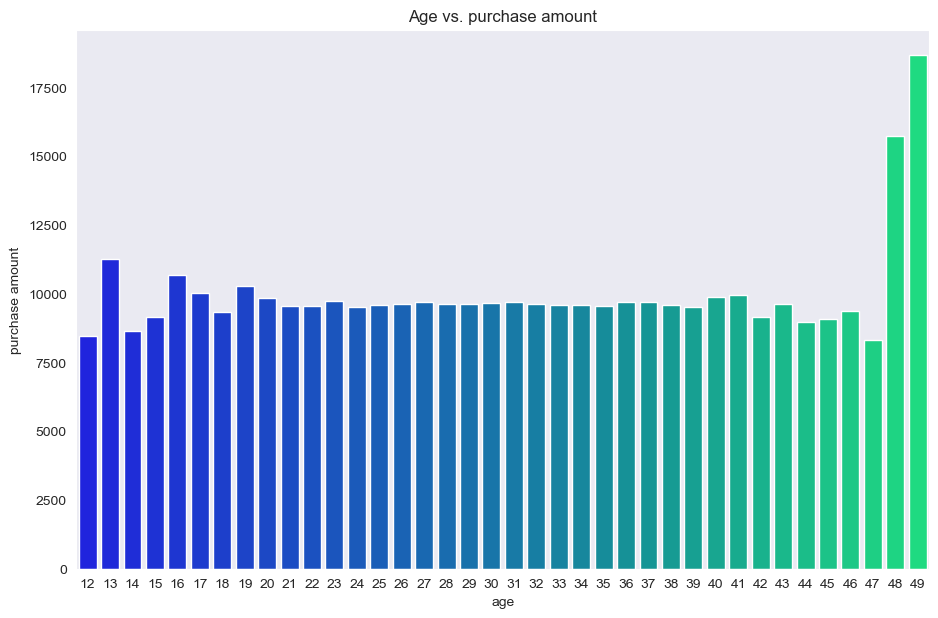

In [146]:
age_purchase_graph= plt.figure(figsize = (11, 7))
sns.barplot(x='age', y='purchase_amount', data= new_customer_df, ci=None,
           palette= 'winter')
plt.title('Age vs. purchase amount')
plt.xlabel('age')
plt.ylabel('purchase amount')
plt.savefig("resources/Age vs purchase amount")
plt.show()

In [115]:
new_customer_df.groupby('age').purchase_amount.mean()

age
12     8455.333333
13    11269.000000
14     8633.846154
15     9166.974359
16    10685.772727
17    10017.699301
18     9345.206009
19    10266.124726
20     9856.582773
21     9570.668071
22     9553.513966
23     9748.220030
24     9528.345638
25     9590.613262
26     9630.954267
27     9684.267872
28     9615.519598
29     9609.652154
30     9654.836698
31     9716.646038
32     9618.124844
33     9595.328251
34     9589.517136
35     9546.379848
36     9707.389339
37     9684.183537
38     9596.143495
39     9525.514167
40     9863.445748
41     9936.266112
42     9155.739669
43     9616.656000
44     8959.051724
45     9083.857143
46     9372.090909
47     8315.153846
48    15745.500000
49    18666.000000
Name: purchase_amount, dtype: float64

In [116]:
gender_purchase_count = new_customer_df.groupby(['gender', 'purchase_frequency'])['purchase_frequency'].size()
gender_purchase_count

gender  purchase_frequency
Female  frequent              10067
        occasional            14931
        rare                  25076
Male    frequent              10028
        occasional            14955
        rare                  24943
Name: purchase_frequency, dtype: int64

In [118]:
data = {'gender': ['Male', 'Female', 'Male', 'Male', 'Female','Female'],
        'abc': [10067, 14931, 25076, 10028, 14955,24943 ]}
gender_purchase_df = pd.DataFrame(data)
sum_abc_by_gender = gender_purchase_df.groupby('gender')['abc'].sum()
print(sum_abc_by_gender)

gender
Female    54829
Male      45171
Name: abc, dtype: int64


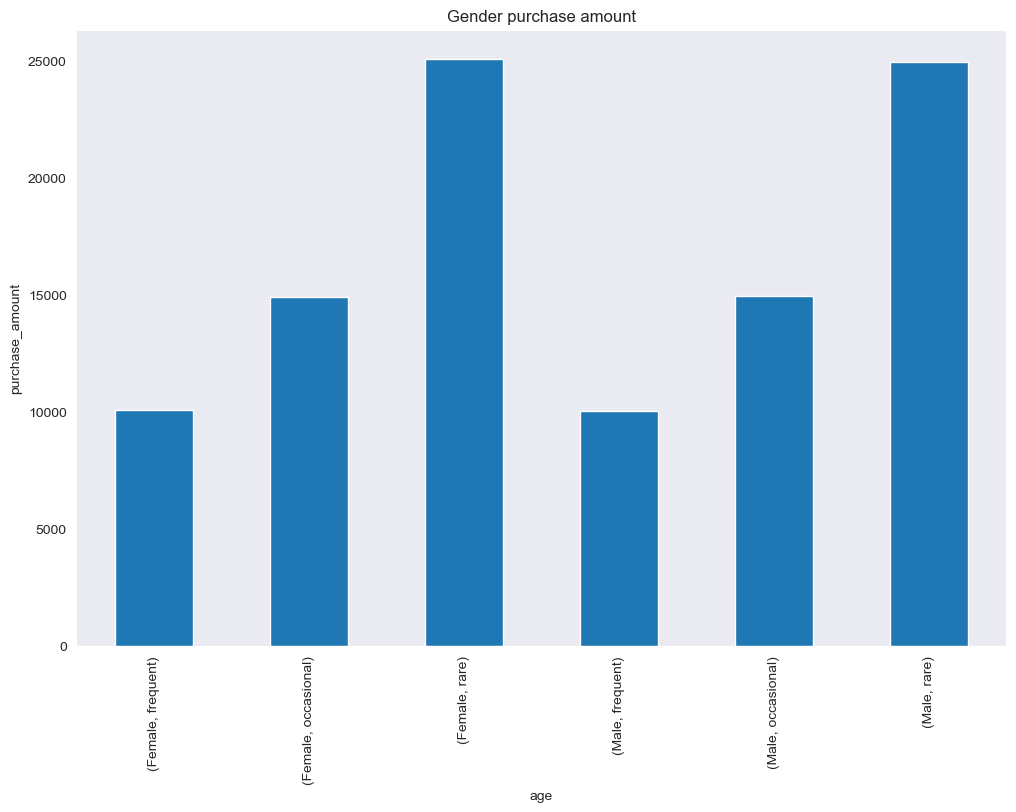

In [147]:
plt.figure(figsize=(12,8))
gender_purchase_count.plot(kind='bar', stacked=True)
plt.title('Gender purchase amount')
plt.xlabel('age')
plt.ylabel('purchase_amount')
plt.savefig("resources/Gender purchase amount")
plt.show()

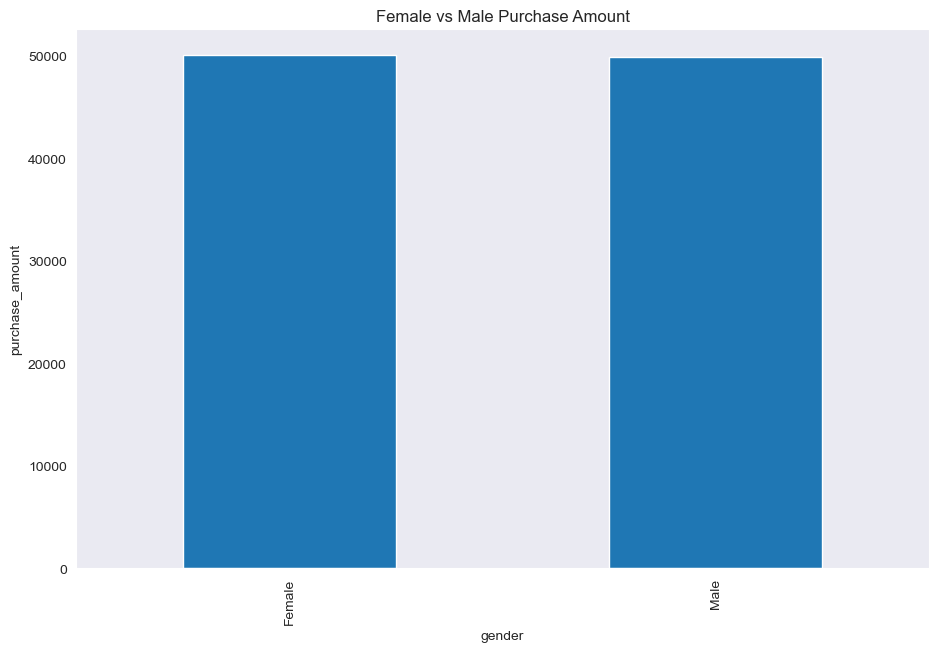

In [149]:
plt.figure(figsize = (11, 7))
new_customer_df.groupby('gender')['purchase_amount'].size().plot(kind='bar')
plt.title('Female vs Male Purchase Amount')
plt.xlabel('gender')
plt.ylabel('purchase_amount')
plt.savefig("resources/Female vs male purchase amount")
plt.show()

In [121]:
#Question 3

#Research Question: How does promotion usage relate to purchase frequency?

#Hypothesis: If offered a promotion then a customer is may feel more inclined to shop

#Null Hypothesis: Despite having a promotion the customer is not more likely to shop

#Alternative Hypothesis: Having a promotion means a customer is more likely to shop

In [122]:
#Data Frame Seperating data by id, Gender, Purchase Frequency, Purchase Amount, Product Category, and Promotion Usage
promotion_data = df.drop(['age', 'income', 'education', 'region', 'satisfaction_score', 'loyalty_status'], axis=1)
promotion_data = promotion_data.dropna()
promotion_data

,id,gender,purchase_frequency,purchase_amount,product_category,promotion_usage
0,1,Male,frequent,18249,Books,0
1,2,Male,rare,4557,Clothing,1
2,3,Male,rare,11822,Clothing,0
3,4,Male,frequent,4098,Food,0
4,5,Female,occasional,19685,Clothing,1
...,...,...,...,...,...,...
99995,99996,Female,occasional,7075,Health,0
99996,99997,Male,rare,6873,Health,0
99997,99998,Male,frequent,5152,Clothing,0
99998,99999,Female,frequent,16312,Health,1


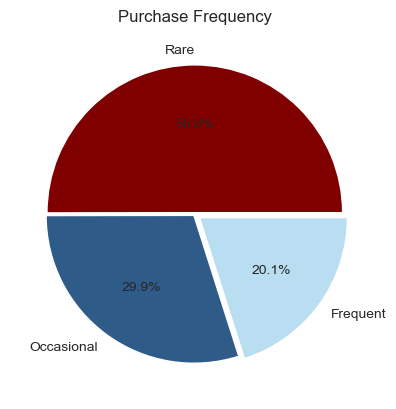

In [123]:
promotion_data['purchase_frequency'].value_counts().plot(kind='pie',
                                                         autopct='%1.1f%%',
                                                         labels=['Rare','Occasional','Frequent'],
                                                         explode=[0.01,0.01,0.04],
                                                        colors=["maroon","#2E5B88", "#B9DDF1"])
plt.title('Purchase Frequency')
plt.ylabel('')
plt.savefig("resources/Purchase Frequency")
plt.show()

In [124]:
#Promotion Used DataFrame
promotion_used = promotion_data[promotion_data['promotion_usage'] > 0]
promotion_used.head(100)

,id,gender,purchase_frequency,purchase_amount,product_category,promotion_usage
1,2,Male,rare,4557,Clothing,1
4,5,Female,occasional,19685,Clothing,1
10,11,Male,rare,16158,Home,1
12,13,Male,occasional,2450,Clothing,1
13,14,Female,occasional,5579,Books,1
...,...,...,...,...,...,...
328,329,Female,occasional,16138,Clothing,1
329,330,Female,occasional,4709,Clothing,1
333,334,Male,rare,10953,Books,1
337,338,Male,rare,15592,Beauty,1


In [125]:
len(promotion_used['purchase_frequency'])

30080

In [126]:
promotion_used['purchase_frequency'].value_counts()

purchase_frequency
rare          15066
occasional     8988
frequent       6026
Name: count, dtype: int64

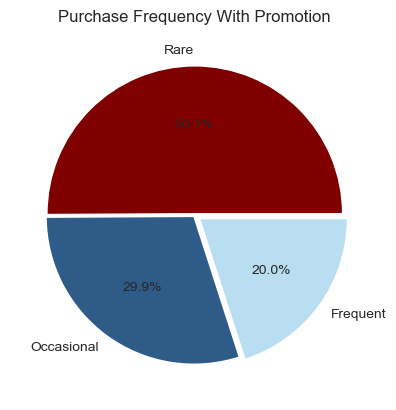

In [127]:
#Promotion Used Visualization
promotion_used['purchase_frequency'].value_counts().plot(kind='pie',
                                                         autopct='%1.1f%%',
                                                         labels=['Rare','Occasional','Frequent'],
                                                         explode=[0.01,0.01,0.04],
                                                        colors=["maroon","#2E5B88", "#B9DDF1"])
plt.title('Purchase Frequency With Promotion')
plt.ylabel('')
plt.savefig("resources/Purchase Frequency With Promotion")
plt.show()

In [128]:
pu = promotion_used['purchase_amount'].sum()

In [129]:
#No Promotion Used DataFrame
no_promotion_used = promotion_data[promotion_data['promotion_usage'] < 1]
no_promotion_used.head(100)

,id,gender,purchase_frequency,purchase_amount,product_category,promotion_usage
0,1,Male,frequent,18249,Books,0
2,3,Male,rare,11822,Clothing,0
3,4,Male,frequent,4098,Food,0
5,6,Male,occasional,2822,Electronics,0
6,7,Female,frequent,3293,Clothing,0
...,...,...,...,...,...,...
140,141,Male,occasional,6098,Electronics,0
141,142,Female,rare,13441,Clothing,0
144,145,Female,rare,11515,Electronics,0
145,146,Male,rare,13114,Food,0


In [130]:
len(no_promotion_used['purchase_frequency'])

69920

In [131]:
no_promotion_used['purchase_frequency'].value_counts()

purchase_frequency
rare          34953
occasional    20898
frequent      14069
Name: count, dtype: int64

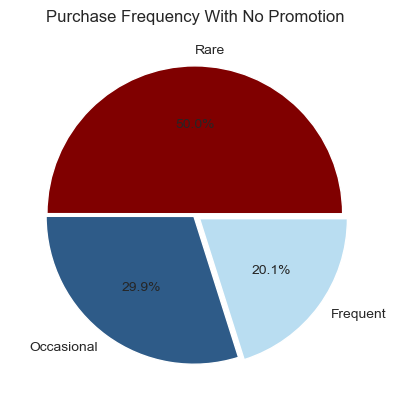

In [132]:
#No Promotion Used Visualization
no_promotion_used['purchase_frequency'].value_counts().plot(kind='pie',
                                                         autopct='%1.1f%%',
                                                         labels=['Rare','Occasional','Frequent'],
                                                         explode=[0.01,0.01,0.04],
                                                        colors=["maroon","#2E5B88", "#B9DDF1"])
plt.title('Purchase Frequency With No Promotion')
plt.ylabel('')
plt.savefig("resources/Purchase Frequency With No Promotion")
plt.show()

In [133]:
npu = no_promotion_used['purchase_amount'].sum()

In [134]:
if npu > pu:
    print("No Promotion Used Spent More")
else: 
    print("Promotion Used Spent More")

No Promotion Used Spent More


In [135]:
## ANALYSIS ##
#Despite the use of an incentive such as a promotion it seems to have no effect on purchase frequency.
# Based on the data we can see that despite having a promotion, purchase frequency remains almost the same. 
# This would mean that a promotion alone does not directly result in any change in purchase frequecny.

In [136]:
##Question##
#Research Question: Which region exhibits higher levels of sales?

#Hypothesis:

#Null Hypothesis: Groups means are equal (no variation in means of groups).

#Alternative Hypothesis: At least, one group mean is different from other groups.

In [137]:
#Find total number of purchases in each region
df['region'].value_counts()

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

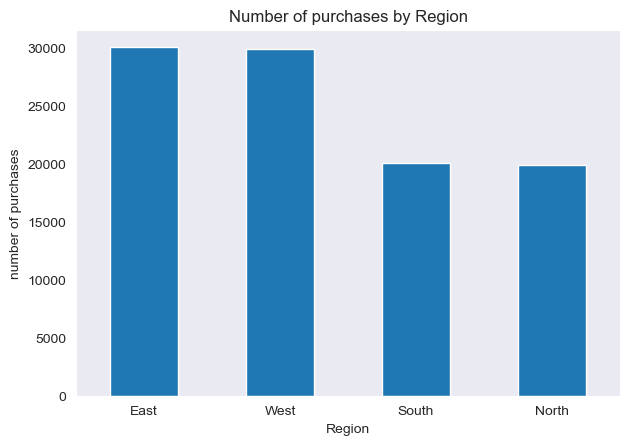

In [138]:
# Configure plot, x-tick rotation, title, and axis labels. Save and show the graph

df['region'].value_counts().plot(kind='bar')
plt.title('Number of purchases by Region')
plt.xlabel('Region')
plt.ylabel('number of purchases')
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig("resources/Number of purchases by Region.png")
plt.show()

In [139]:
#Get total purchase by region 
df.groupby("region")["purchase_amount"].sum()

region
East     289173865
North    192674021
South    193680103
West     287951095
Name: purchase_amount, dtype: int64

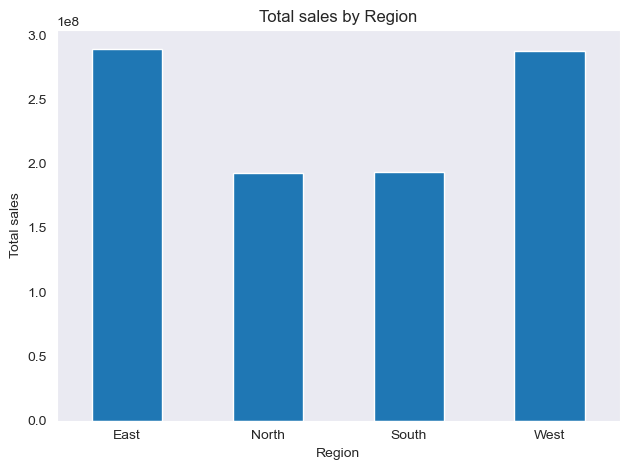

In [140]:
# Configure plot, x-tick rotation, title, and axis labels. Save and show the graph
df.groupby('region')['purchase_amount'].sum().plot(kind='bar')
plt.title('Total sales by Region')
plt.xlabel('Region')
plt.ylabel('Total sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("resources/Total sales by Region.png")
plt.show()

<Axes: title={'center': 'purchase_amount'}, xlabel='region'>

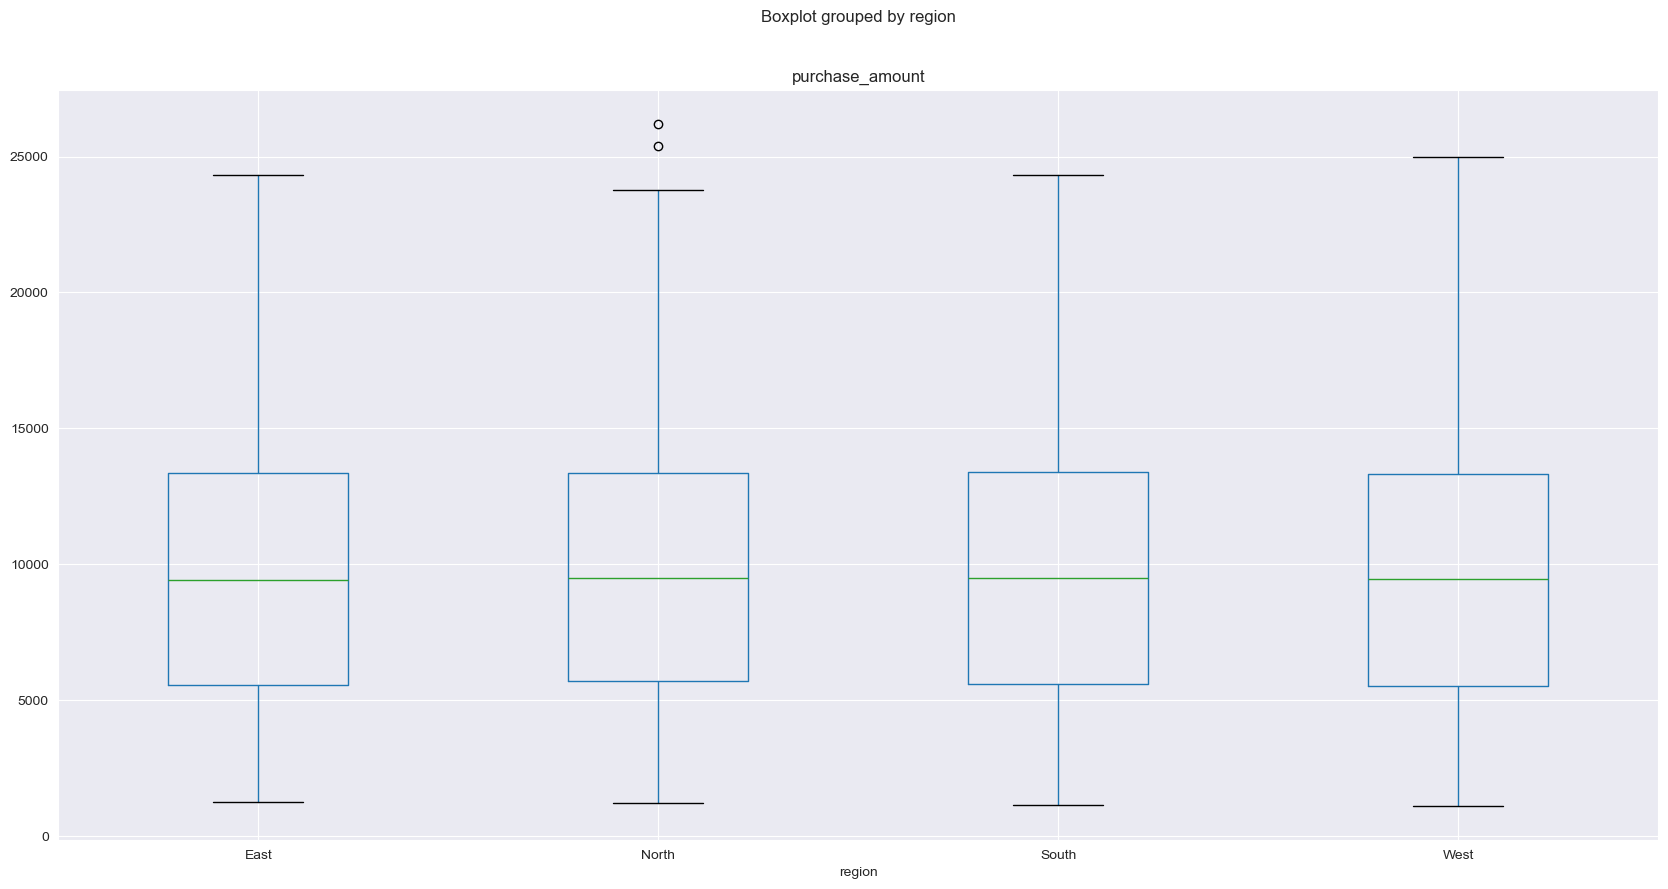

In [141]:
# Create a boxplot to compare means
df.boxplot("purchase_amount", by="region", figsize=(20, 10))


In [143]:
# Extract individual groups
group0 = df[df["region"] == 'East']["purchase_amount"]
group1 = df[df["region"] == 'North']["purchase_amount"]
group1 = df[df["region"] == 'South']["purchase_amount"]
group1 = df[df["region"] == 'West']["purchase_amount"]
# Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.009373702611209948, pvalue=0.922871344817896)

In [145]:
#The p value obtained from ANOVA analysis is not significant (p > 0.05), and therefore, 
# we conclude that there are no significant differences among regions